In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [85]:
# https://stats.stackexchange.com/questions/267078/why-is-skewed-data-not-preferred-for-modelling
# https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data

# imputation
- Mice, Mean, or Drop

# discretization
- Supervised or Unsupervised

# target
- under or oversampling

In [32]:
df = pd.read_csv('data/TrainingWiDS2021.csv', index_col=[0])

In [3]:
df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
df.shape

(130157, 180)

In [5]:
test_df = pd.read_csv('data/UnlabeledWiDS2021.csv', index_col=[0])

In [6]:
test_df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,142038,10141,72,NaN,0,Caucasian,F,162.6,Floor,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,138628,10141,66,NaN,0,Caucasian,M,177.8,Floor,Floor,...,NaN,NaN,NaN,0,0,0,0,0,0,0
5,141682,10141,89,NaN,0,Caucasian,M,170.2,Direct Admit,Accident & Emergency,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [7]:
set(df.columns) - set(test_df.columns)

{'diabetes_mellitus'}

In [33]:
target_name = "diabetes_mellitus"

In [45]:
df[target_name].value_counts() / df.shape[0]

0    0.783715
1    0.216285
Name: diabetes_mellitus, dtype: float64

In [9]:
test_df.shape

(10234, 179)

In [36]:
df = pd.concat([df.iloc[:, 90:135], df[target_name] ],axis=1)

In [38]:
df.shape

(130157, 46)

In [39]:
df.head()

,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,...,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,diabetes_mellitus
1,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,...,NaN,NaN,NaN,NaN,9.0,9.0,8.6,8.6,0.56,1
3,148.0,124.0,148.0,124.0,36.7,36.7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,136.0,106.0,NaN,NaN,35.6,34.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [40]:
stats = df.describe()

In [41]:
stats.iloc[:, :10]

,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min
count,124638.000000,124638.000000,118827.000000,118827.000000,100454.000000,100454.000000,58751.000000,58751.000000,53422.000000,53422.000000
mean,133.262584,115.951981,133.059136,116.082237,36.722597,36.613964,2.952673,2.883073,1.191379,1.117405
std,27.452037,26.315817,27.573246,26.422179,0.773744,0.796852,0.675606,0.679808,2.319165,2.201525
min,75.000000,53.000000,75.000000,53.000000,33.400000,32.900000,1.200000,1.100000,0.200000,0.200000
25%,113.000000,97.000000,113.000000,98.000000,36.400000,36.300000,2.500000,2.400000,0.400000,0.400000
50%,131.000000,114.000000,130.000000,115.000000,36.700000,36.700000,3.000000,2.900000,0.700000,0.600000
75%,150.000000,133.000000,150.000000,133.000000,37.100000,37.000000,3.400000,3.400000,1.100000,1.000000
max,223.000000,194.000000,223.000000,195.000000,39.500000,39.300000,4.600000,4.500000,60.200000,58.000000


bilirunbin's range is not "usual" as other columns

In [48]:
the_df = df[df['d1_bilirubin_min'] <= 10]
the_df[target_name].value_counts() / the_df.shape[0]

0    0.779256
1    0.220744
Name: diabetes_mellitus, dtype: float64

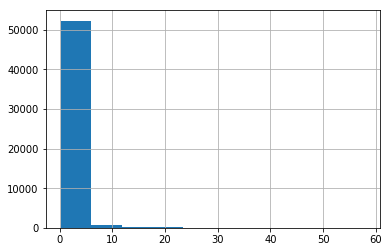

In [26]:
df['d1_bilirubin_min'].hist(bins=10)

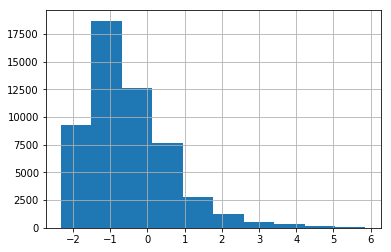

In [60]:
np.log2(df['d1_bilirubin_min']).hist()

In [49]:
the_df = df[df['d1_bilirubin_max'] <= 10]
the_df[target_name].value_counts() / the_df.shape[0]

0    0.779164
1    0.220836
Name: diabetes_mellitus, dtype: float64

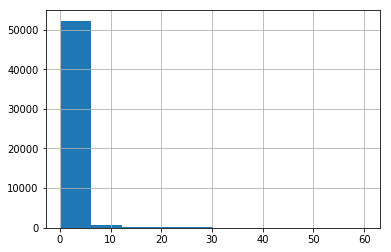

In [27]:
df['d1_bilirubin_max'].hist()

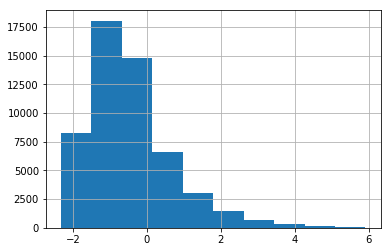

In [58]:
np.log2(df['d1_bilirubin_max']).hist()

In [18]:
stats.iloc[:, 10:20]

,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min
count,116423.000000,116423.000000,113465.000000,113465.000000,116884.000000,116884.000000,121914.000000,121914.000000,110110.000000,110110.000000
mean,25.578808,23.554154,8.379782,8.164674,1.493531,1.363795,174.149802,114.440310,24.452872,23.192344
std,20.495927,18.708332,0.740098,0.793055,1.525906,1.341642,86.545466,38.217682,4.364990,5.000293
min,4.000000,3.000000,6.200000,5.500000,0.340000,0.300000,73.000000,33.000000,12.000000,7.000000
25%,13.000000,12.000000,7.900000,7.700000,0.750000,0.710000,117.000000,91.000000,22.000000,21.000000
50%,19.000000,17.000000,8.400000,8.200000,1.000000,0.940000,150.000000,108.000000,24.000000,23.000000
75%,31.000000,29.000000,8.800000,8.700000,1.510000,1.400000,200.000000,131.000000,27.000000,26.000000
max,126.000000,113.090000,10.800000,10.300000,11.110000,9.937900,611.000000,288.000000,40.000000,39.000000


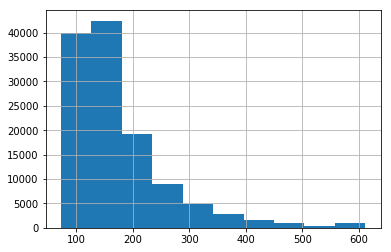

In [50]:
df['d1_glucose_max'].hist()

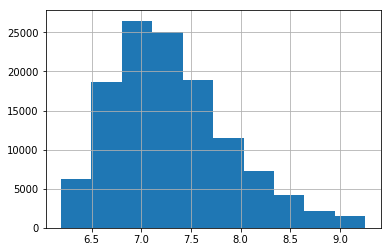

In [57]:
np.log2(df['d1_glucose_max']).hist()

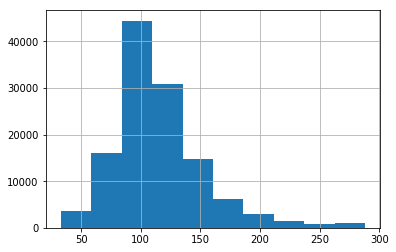

In [51]:
df['d1_glucose_min'].hist()

In [19]:
stats.iloc[:, 30:40]

,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min
count,117611.000000,117611.000000,116887.000000,116887.000000,112728.000000,112728.000000,11152.000000,11152.000000,10296.000000,10296.000000
mean,4.253053,3.929256,139.149448,137.692273,12.539672,11.298567,3.008563,3.007254,1.187979,1.187173
std,0.666942,0.579459,4.827752,4.926242,6.782836,5.924633,0.738170,0.738457,2.375772,2.375223
min,2.800000,2.400000,123.000000,117.000000,1.200000,0.900000,1.100000,1.100000,0.200000,0.200000
25%,3.800000,3.600000,137.000000,135.000000,8.000000,7.400000,2.500000,2.500000,0.400000,0.400000
50%,4.200000,3.900000,139.000000,138.000000,11.100000,10.100000,3.100000,3.100000,0.700000,0.700000
75%,4.600000,4.300000,142.000000,141.000000,15.300000,13.700000,3.500000,3.500000,1.100000,1.100000
max,7.000000,5.800000,158.000000,153.000000,46.080000,40.898000,4.700000,4.700000,58.000000,58.000000


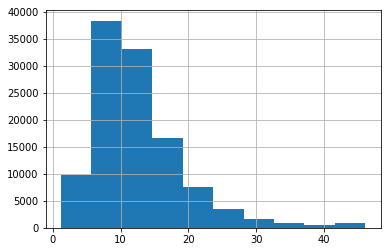

In [63]:
df['d1_wbc_max'].hist()

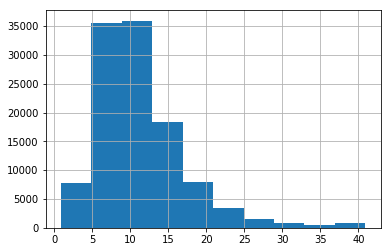

In [64]:
df['d1_wbc_min'].hist()

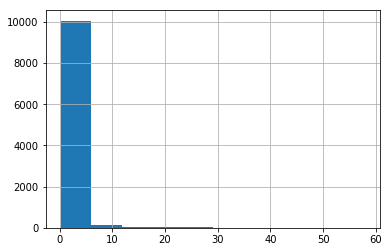

In [65]:
df['h1_bilirubin_max'].hist()

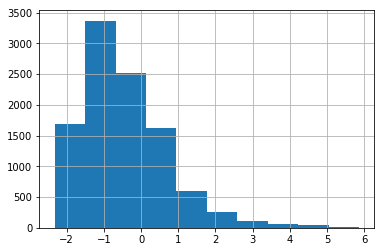

In [67]:
np.log2(df['h1_bilirubin_max']).hist()

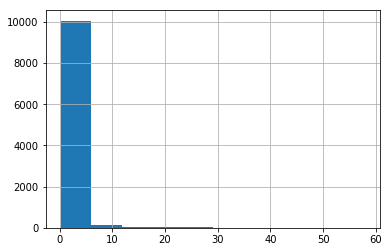

In [66]:
df['h1_bilirubin_min'].hist()

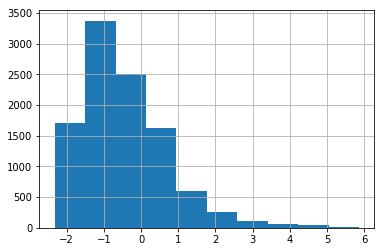

In [68]:
np.log2(df['h1_bilirubin_min']).hist()

In [69]:
stats.iloc[:, 40:]

,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,diabetes_mellitus
count,25167.000000,25167.000000,24236.000000,24236.000000,25373.000000,130157.000000
mean,25.631220,25.606374,8.274175,8.265049,1.526582,0.216285
std,21.377589,21.360676,0.892787,0.905489,1.572771,0.411712
min,4.000000,4.000000,5.600000,5.300000,0.330000,0.000000
25%,13.000000,13.000000,7.700000,7.700000,0.780000,0.000000
50%,18.000000,18.000000,8.300000,8.300000,1.010000,0.000000
75%,30.000000,30.000000,8.800000,8.800000,1.540000,0.000000
max,135.000000,135.000000,11.400000,11.315000,11.604200,1.000000


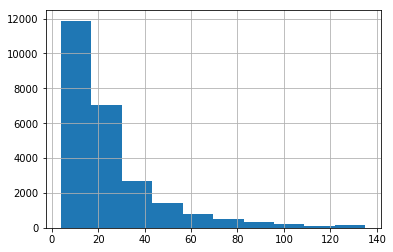

In [70]:
df['h1_bun_max'].hist()

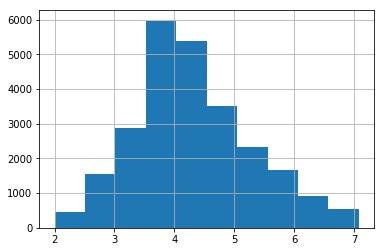

In [72]:
np.log2(df['h1_bun_max']).hist()

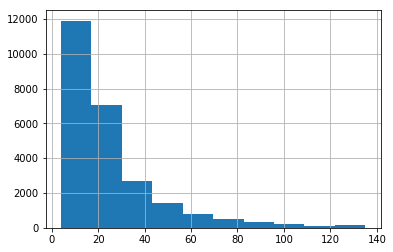

In [71]:
df['h1_bun_min'].hist()

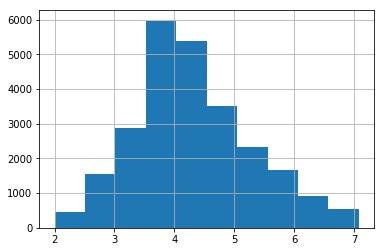

In [73]:
np.log2(df['h1_bun_min']).hist()

In [76]:
df.iloc[:, 2].isnull().value_counts()

False    118827
True      11330
Name: h1_sysbp_noninvasive_max, dtype: int64

In [77]:
def mean_imputation(df):
    return SimpleImputer(strategy="mean").fit_transform(df)

In [78]:
def mice_imputation(df):
    return IterativeImputer(random_state=42).fit_transform(df)

In [79]:
df.values

array([[131.  , 115.  , 131.  , ...,    nan,    nan,   1.  ],
       [ 95.  ,  71.  ,  95.  , ...,   8.6 ,   0.56,   1.  ],
       [148.  , 124.  , 148.  , ...,    nan,    nan,   0.  ],
       ...,
       [134.  , 134.  , 134.  , ...,    nan,    nan,   1.  ],
       [128.  ,  70.  , 128.  , ...,    nan,    nan,   0.  ],
       [143.  , 127.  , 143.  , ...,   9.5 ,   1.06,   0.  ]])

In [80]:
df.iloc[:, 2].mean()

133.05913639156083

In [81]:
mean_imputed_df = mean_imputation(df.values)

In [82]:
mice_imputed_df = mice_imputation(df.values)

/home/ej/github/cmpe255-project/cmpe255-project/lib/python3.6/site-packages/sklearn/impute/_iterative.py:599: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


# TODO
1. Discretization
2. after merging preprocessings
    - Feature Selection
    - Over or Undersampling of target
3. Decision-tree based, Keras
    - RandomForest, Gradient Boost
    - DNN with dropout, batch normalization etc